# RANDOM FOREST CLASSIFIER ALGORITHM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load given dataset
df = pd.read_csv('UPI_FRAUD.csv')
del df['Merchant_id']
del df['TransactionDate']

df.head()

,AverageAmountTransactionDay,TransactionAmount,Is_declined,TotalNumberOfDeclinesDay,isForeignTransaction,isHighRiskCountry,DailyChargebackAvgAmt,Six_MonthAvgChbkAmt,Six_MonthChbkFreq,isFradulent
0,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [3]:
df.columns

Index(['AverageAmountTransactionDay', 'TransactionAmount', 'Is_declined',
       'TotalNumberOfDeclinesDay', 'isForeignTransaction', 'isHighRiskCountry',
       'DailyChargebackAvgAmt', 'Six_MonthAvgChbkAmt', 'Six_MonthChbkFreq',
       'isFradulent'],
      dtype='object')

In [4]:
df=df.dropna()

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Is_declined','isForeignTransaction', 'isHighRiskCountry', 'isFradulent']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [6]:
df.head()

,AverageAmountTransactionDay,TransactionAmount,Is_declined,TotalNumberOfDeclinesDay,isForeignTransaction,isHighRiskCountry,DailyChargebackAvgAmt,Six_MonthAvgChbkAmt,Six_MonthChbkFreq,isFradulent
0,100.0,3000.0,0,5,1,1,0,0.0,0,1
1,100.0,4300.0,0,5,1,1,0,0.0,0,1
2,185.5,4823.0,1,5,0,0,0,0.0,0,1
3,185.5,5008.5,1,8,0,0,0,0.0,0,1
4,500.0,26000.0,0,0,1,1,800,677.2,6,1


In [7]:
x1 = df.drop(labels='isFradulent', axis=1)
y1 = df.loc[:,'isFradulent']

In [8]:
x1

,AverageAmountTransactionDay,TransactionAmount,Is_declined,TotalNumberOfDeclinesDay,isForeignTransaction,isHighRiskCountry,DailyChargebackAvgAmt,Six_MonthAvgChbkAmt,Six_MonthChbkFreq
0,100.0,3000.0,0,5,1,1,0,0.0,0
1,100.0,4300.0,0,5,1,1,0,0.0,0
2,185.5,4823.0,1,5,0,0,0,0.0,0
3,185.5,5008.5,1,8,0,0,0,0.0,0
4,500.0,26000.0,0,0,1,1,800,677.2,6
...,...,...,...,...,...,...,...,...,...
3070,500.0,11000.0,1,0,0,0,754,585.0,7
3071,800.0,0.0,1,0,0,0,754,585.0,7
3072,800.0,20800.0,1,0,0,0,754,585.0,7
3073,1500.0,12000.0,1,0,1,1,754,585.0,7


In [9]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({0: 2627, 1: 448})
OVER SAMPLING DATA COUNT  :  Counter({1: 2627, 0: 2627})


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.20, random_state=42, stratify=y1)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  2460
NUMBER OF TEST DATASET      :  615
TOTAL NUMBER OF DATASET    :  3075


In [11]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  2460
NUMBER OF TEST DATASET      :  615
TOTAL NUMBER OF DATASET    :  3075


In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
RFC = RandomForestClassifier(random_state=42)
RFC.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [14]:
predicted = RFC.predict(x_test)

In [15]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER:\n\n',cr)

THE CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       525
           1       0.97      0.96      0.96        90

    accuracy                           0.99       615
   macro avg       0.98      0.97      0.98       615
weighted avg       0.99      0.99      0.99       615



In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:


 [[522   3]
 [  4  86]]


In [17]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(RFC, x1, y1, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [97.88617886 99.18699187 98.21138211 98.69918699 98.21138211]


In [18]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS : 98.86178861788618


In [19]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF RANDOM FOREST CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF RANDOM FOREST CLASSIFIER IS : 1.1382113821138211


THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:


[[522   3]
 [  4  86]]


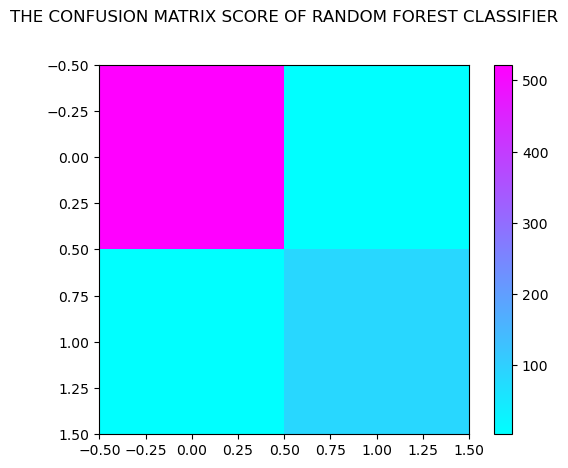

In [20]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER\n\n', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:\n\n')
print(cm)
plot_confusion_matrix(cm)

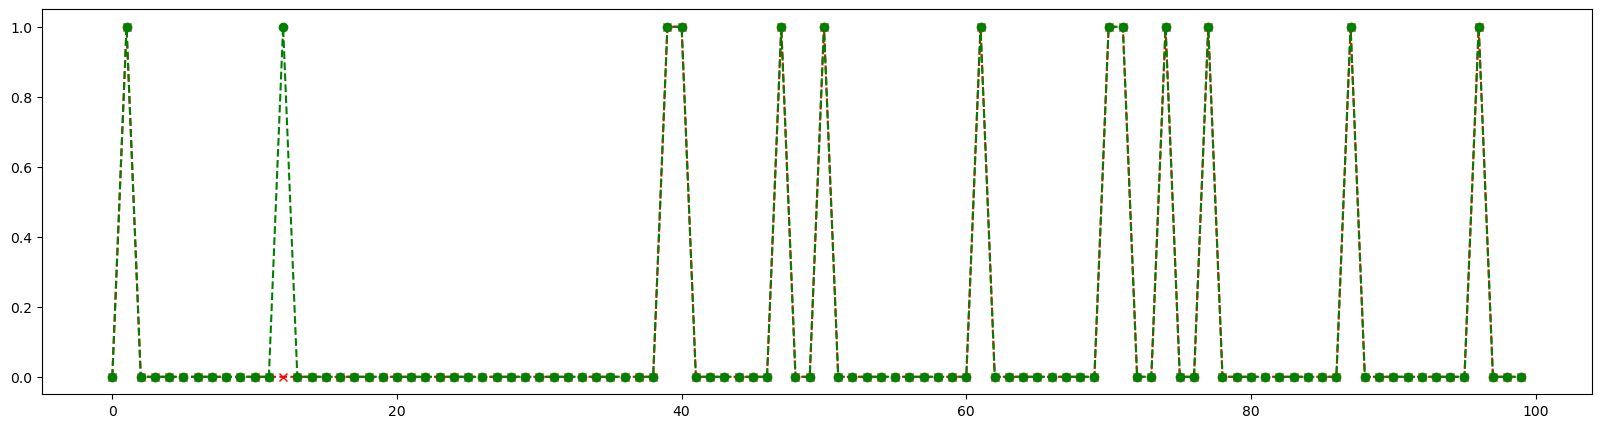

In [21]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [22]:
import joblib
joblib.dump(RFC, 'UPI1.pkl')

['UPI1.pkl']